# Emilio Flores - DSC 650 - Project 2 - Milestone 2
# Wine Quality Classifier Model

## Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Import Data

In [2]:
# Import csv file
wqt_df = pd.read_csv('WineQT.csv')

## Clean Data

In [3]:
# Remove 'ID' column
wqt_df = wqt_df.drop('Id', axis= 1)

## Prepare Model

In [4]:
# Define features
X = wqt_df.drop('quality', axis= 1)

# Define target
y = wqt_df['quality']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Find best parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create random forest model
rf = RandomForestClassifier(random_state=42)

# Run grid search to find best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.6520146520146521


In [29]:
# Select best perfoming parameters
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

## Model Accuracy

In [30]:
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7030567685589519


In [31]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.81      0.76        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



c:\Users\emili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emili\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 78 17  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


## Visualization

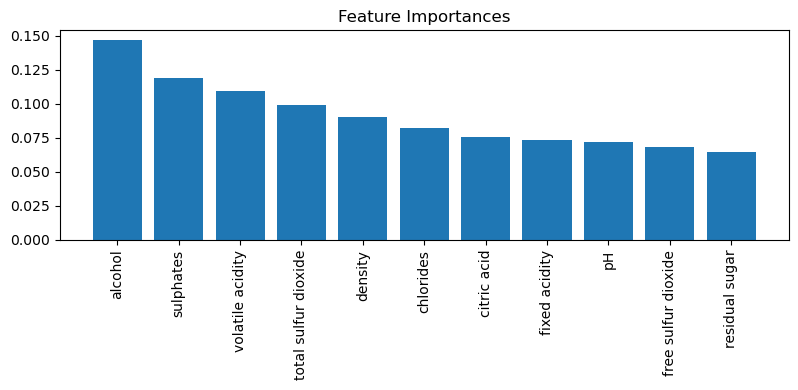

In [33]:
# Plot top importance factors
importances = best_rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

# Select figure size
plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), importances[indices])

# Add title and labels
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)

# Show plot
plt.tight_layout()
plt.show()

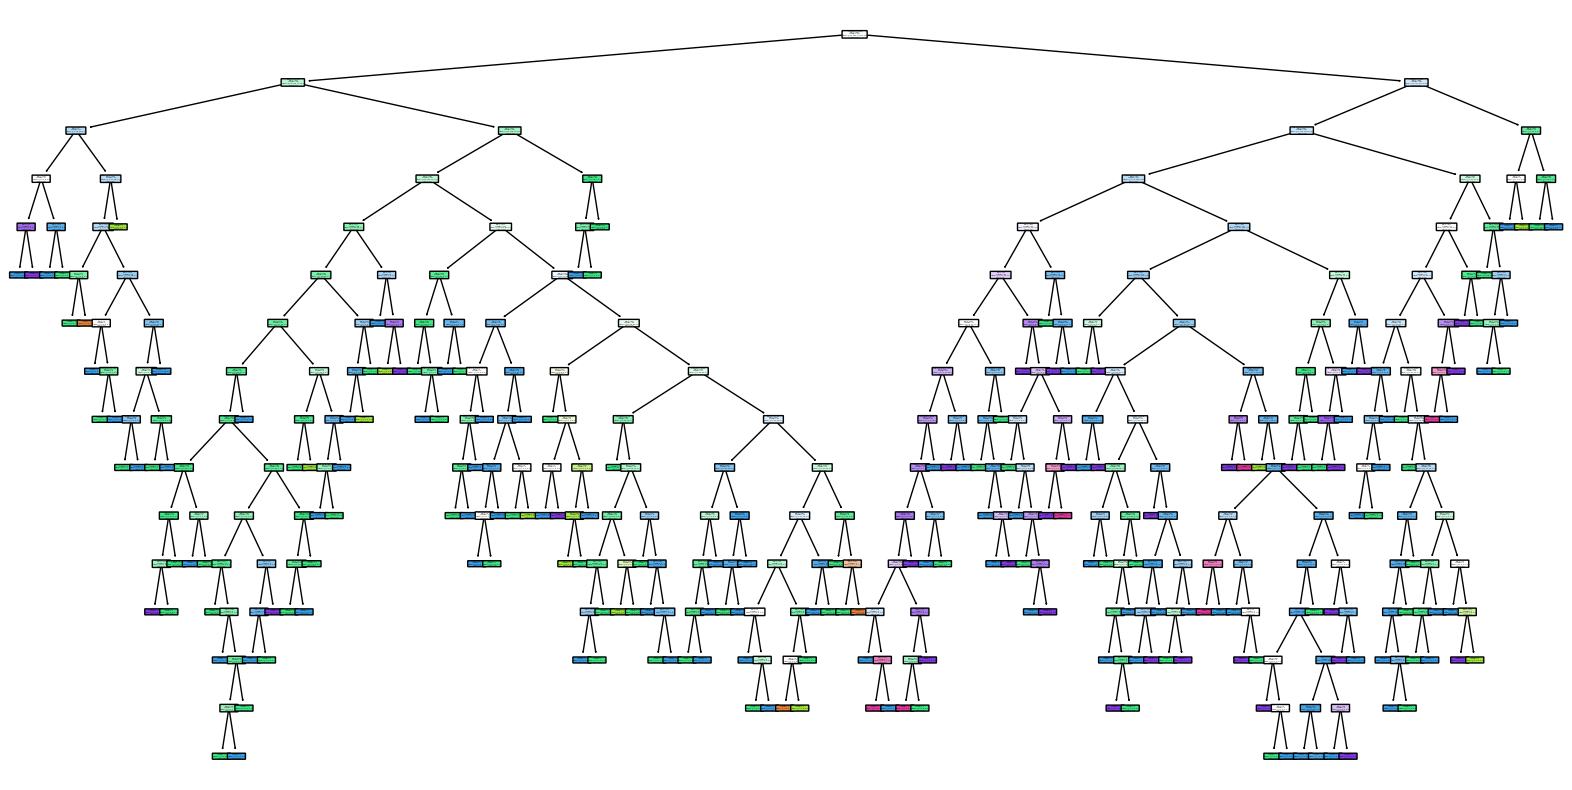

In [34]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, 
          class_names=True, filled=True, rounded=True)
plt.show()